In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np
import seaborn as sns
%matplotlib inline

from IPython.display import Image

In [222]:
#read in the data

items = pd.read_csv('items.csv')
villagers = pd.read_csv('villagers.csv')

In [223]:
items.head(3)

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN


In [224]:
villagers.head(3)

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
0,2,admiral,Admiral,male,bird,1-27,cranky,Steep Hill,aye aye,villager-admiral,https://villagerdb.com/images/villagers/thumb/...
1,3,agent-s,Agent S,female,squirrel,7-2,peppy,DJ K.K.,sidekick,villager-agent-s,https://villagerdb.com/images/villagers/thumb/...
2,4,agnes,Agnes,female,pig,4-21,uchi,K.K. House,snuffle,villager-agnes,https://villagerdb.com/images/villagers/thumb/...


### Some questions to answer:

1. What are the most expensive items? 
2. What are the least expensive items?
3. Percent of categories of items in the game?
4. Gender balance of characters?
5. Personality make up of villagers?


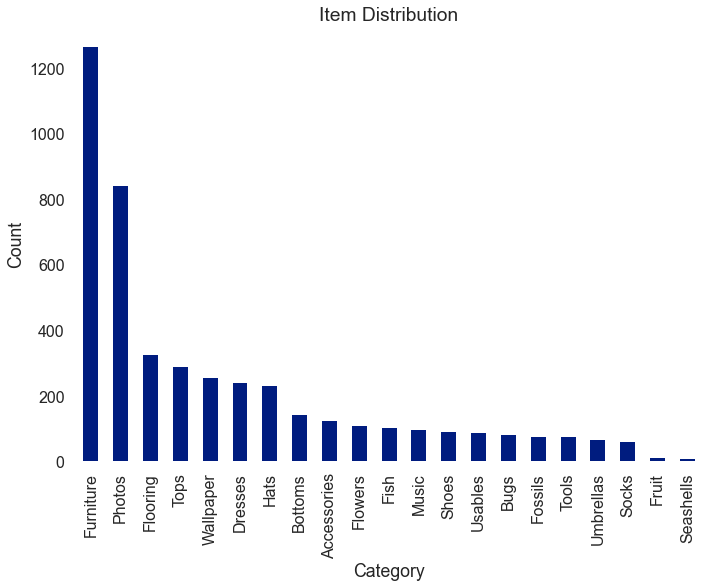

In [225]:
#Let's see the distribution of categories across items! 

plt.style.use('seaborn-white') 
items['category'].value_counts().plot(kind='bar', rot=90, figsize=(10,8))
plt.title('Item Distribution')
plt.ylabel('Count')
plt.xlabel('Category')
plt.box(False) #remove box
plt.show()

In [226]:
#Makes sense that there are over 1,000 furniture items! One of the biggest appeal 
#in Animal Crossing is home decor customization.


In [227]:
#exploring the furnitures
furniture = items['category'] == 'Furniture'
items[furniture].head()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
5,21,accessories-stand,Accessories Stand,Furniture,True,375.0,bells,1500.0,bells,Nook's Cranny,False,NaN,NaN,nh,item-accessories-stand,https://villagerdb.com/images/items/thumb/acce...
8,26,acnh-nintendo-switch,Acnh Nintendo Switch,Furniture,True,8990.0,bells,35960.0,bells,Receive in mail if playing on ACNH Switch,False,NaN,NaN,nh,item-acnh-nintendo-switch,https://villagerdb.com/images/items/thumb/acnh...
9,26,acnh-nintendo-switch,Acnh Nintendo Switch,Furniture,True,8990.0,bells,35960.0,bells,Nook Shopping,False,NaN,NaN,nh,item-acnh-nintendo-switch,https://villagerdb.com/images/items/thumb/acnh...
13,31,acoustic-guitar,Acoustic Guitar,Furniture,NaN,3210.0,bells,12840.0,bells,NaN,True,8.0,softwood,nh,item-acoustic-guitar,https://villagerdb.com/images/items/thumb/acou...
14,31,acoustic-guitar,Acoustic Guitar,Furniture,NaN,3210.0,bells,12840.0,bells,NaN,True,3.0,iron-nugget,nh,item-acoustic-guitar,https://villagerdb.com/images/items/thumb/acou...


In [228]:
items['buy_value'].max()

1200000.0

In [229]:
pricey = items['sell_value'] == items['sell_value'].max()

In [230]:
items[pricey][['name', 'category', 'sell_value', 'buy_value']]

,name,category,sell_value,buy_value
3453,Royal Crown,Hats,300000.0,1200000.0


In [231]:
#Seems like the most expensive item to buy and/or sell is the Royal Crown! 


In [232]:
# import matplotlib, random

# hex_colors_dic = {}
# rgb_colors_dic = {}
# hex_colors_only = []
# for name, hex in matplotlib.colors.cnames.items():
#     hex_colors_only.append(hex)
#     hex_colors_dic[name] = hex
#     rgb_colors_dic[name] = matplotlib.colors.to_rgb(hex)

# print(hex_colors_only)

# # getting random color from list of hex colors

# print(random.choice(hex_colors_only))

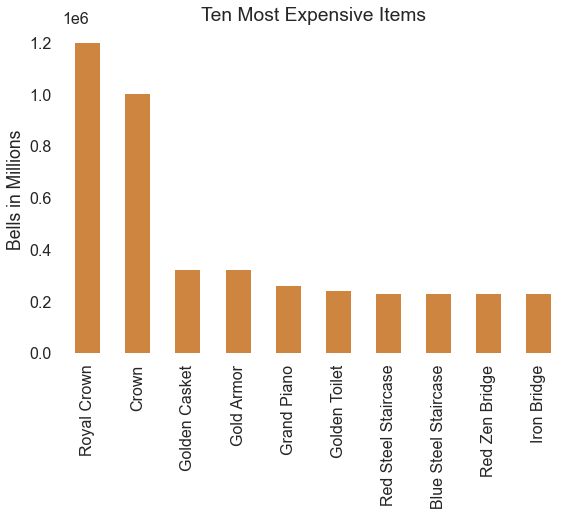

In [233]:
items[['name', 'buy_value']].set_index('name').sort_values('buy_value', ascending = False).head(10).plot(kind='bar', figsize=(8,6), legend=None, color='#CD853F')
plt.title('Ten Most Expensive Items')
plt.ylabel('Bells in Millions')
plt.xlabel('')
plt.box(False) #remove box




plt.show()

In [234]:
#The top 10 most expensive items all have luxurious names! And of course, the golden toilet.

In [235]:
cheapy = items['buy_value'] == items['buy_value'].min()

In [236]:
items[cheapy][['name', 'category', 'sell_value', 'buy_value']].groupby('category').mean()

,sell_value,buy_value
category,,
Accessories,10.0,40.0
Bottoms,10.0,40.0
Bugs,10.0,40.0
Dresses,10.0,40.0
Furniture,10.0,40.0
Photos,10.0,40.0
Socks,10.0,40.0
Tops,10.0,40.0


In [237]:
#The cheapest items to buy are photos! 

In [238]:
cheap = items['sell_value'] == items['sell_value'].min()

In [239]:
items[cheap][['name', 'category', 'sell_value', 'buy_value']]

,name,category,sell_value,buy_value
4156,Tree Branch,Usables,5.0,NaN
4157,Tree Branch,Usables,5.0,NaN


In [240]:
#The least profitable items to sell are tree branches, but hey at least they're worth something!

Let's take a look at the villagers! 

In [241]:
villagers.columns

Index(['row_n', 'id', 'name', 'gender', 'species', 'birthday', 'personality',
       'song', 'phrase', 'full_id', 'url'],
      dtype='object')

In [242]:
villagers['gender'].value_counts(normalize=True)

male      0.521739
female    0.478261
Name: gender, dtype: float64

In [243]:
#Male and Female character distribution is about even

In [244]:
villagers['species'].nunique()  #There are 35 different species in Animal Crossing

35

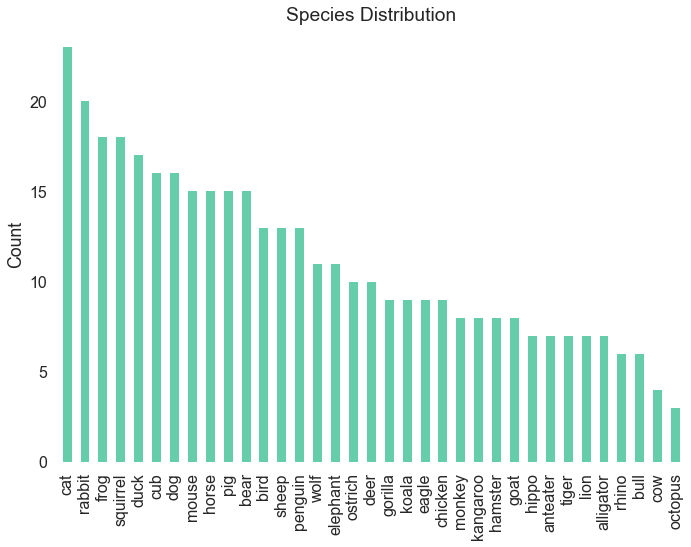

In [251]:
villagers['species'].value_counts().plot(kind='bar', color = '#66CDAA', figsize=(10,8))
plt.title('Species Distribution')
plt.ylabel('Count')
plt.xlabel('')
plt.box(False) #remove box
plt.show()

In [246]:
#cats and rabbits dominate the village! 

In [247]:
personalities = ['cranky', 'peppy', 'uchi', 'lazy', 'normal', 'snooty', 'jock', 'smug']

In [248]:
villagers['personality']

0      cranky
1       peppy
2        uchi
3        lazy
4        lazy
        ...  
386     peppy
387    cranky
388    snooty
389      smug
390      lazy
Name: personality, Length: 391, dtype: object

In [269]:
cranky = villagers['personality'] == 'cranky'
peppy = villagers['personality'] == 'peppy'
uchi = villagers['personality'] == 'uchi'
lazy = villagers['personality'] == 'lazy'
normal = villagers['personality'] == 'normal'
snooty = villagers['personality'] == 'snooty'
jock = villagers['personality'] == 'jock'
smug = villagers['personality'] == 'smug'

In [283]:
villagers[cranky]['species'].value_counts()

wolf         5
bear         5
eagle        4
bull         3
gorilla      3
frog         3
cat          2
hippo        2
kangaroo     2
pig          2
cub          2
squirrel     2
mouse        2
horse        1
tiger        1
dog          1
lion         1
monkey       1
octopus      1
deer         1
bird         1
alligator    1
rabbit       1
chicken      1
rhino        1
penguin      1
hamster      1
elephant     1
goat         1
anteater     1
koala        1
Name: species, dtype: int64

In [280]:
villagers[normal]['species'].value_counts()

squirrel     5
cub          4
elephant     3
pig          3
cat          3
kangaroo     3
koala        3
sheep        3
dog          3
mouse        2
goat         2
rhino        2
duck         2
horse        2
ostrich      2
frog         2
hippo        1
monkey       1
octopus      1
deer         1
bird         1
alligator    1
eagle        1
rabbit       1
hamster      1
penguin      1
wolf         1
anteater     1
chicken      1
cow          1
bear         1
Name: species, dtype: int64

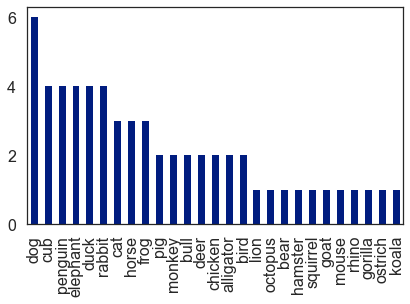

In [286]:
villagers[lazy]['species'].value_counts().plot(kind='bar')
plt.show()

In [297]:
#Looks like dogs are the laziest characters! Here are the 6! 

villagers[lazy][villagers['species'] == 'dog']['name']

<ipython-input-297-80e066545063>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  villagers[lazy][villagers['species'] == 'dog']['name']


34     Benjamin
42       Biskit
49        Bones
215       Lucky
224      Marcel
379      Walker
Name: name, dtype: object

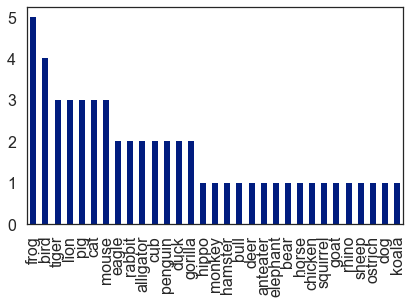

In [288]:
villagers[jock]['species'].value_counts().plot(kind='bar')
plt.show()

In [299]:
#And it seems like frogs are the jockiest? Here are the 5! 
villagers[jock][villagers['species'] == 'frog']['name']

<ipython-input-299-8b4f9bee47c8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  villagers[jock][villagers['species'] == 'frog']['name']


96     Cousteau
121       Drift
146     Frobert
303      Ribbot
352         Tad
Name: name, dtype: object

In [279]:
villagers[snooty]['species'].value_counts()

cat          5
squirrel     4
duck         4
sheep        4
ostrich      3
wolf         3
elephant     2
horse        2
chicken      2
rabbit       2
cow          2
mouse        2
penguin      2
kangaroo     2
hamster      1
deer         1
bird         1
monkey       1
alligator    1
hippo        1
cub          1
anteater     1
frog         1
tiger        1
eagle        1
pig          1
gorilla      1
goat         1
dog          1
koala        1
Name: species, dtype: int64

That's all for now! 